In [4]:
import geopy.distance
import pandas as pd
# Baca dataset
df2 = pd.read_csv('coordinate.csv', delimiter=';')
selected_indices = [11, 8, 9, 40, 17, 39, 14, 15, 33]
df2 = df2.loc[selected_indices]
# Fungsi untuk mendapatkan matriks jarak menggunakan geopy
def get_distance_matrix(df):
    distances = {}
    for i, place1 in df.iterrows():
        coords_1 = (place1['Lat'], place1['Long'])
        for j, place2 in df.iterrows():
            if i != j:
                coords_2 = (place2['Lat'], place2['Long'])
                distance = geopy.distance.geodesic(coords_1, coords_2).km
                distances[(place1['Place'], place2['Place'])] = distance
    return distances

# Panggil fungsi untuk mendapatkan matriks jarak
distances = get_distance_matrix(df2)

# Print hasil jarak antar tempat wisata
for (place1, place2), distance in distances.items():
    print(f"Jarak dari {place1} ke {place2}: {distance:.2f} km")

Jarak dari Pantai Teluk Terima ke Pantai Candikusuma: 13.32 km
Jarak dari Pantai Teluk Terima ke Pantai Pebuahan: 20.85 km
Jarak dari Pantai Teluk Terima ke Bendungan Benel: 15.24 km
Jarak dari Pantai Teluk Terima ke Air Terjun Kayangan Sawe: 23.55 km
Jarak dari Pantai Teluk Terima ke Wisata Puncak JR Jembrana Bali: 20.27 km
Jarak dari Pantai Teluk Terima ke Air Terjun Yeh Mesee: 22.23 km
Jarak dari Pantai Teluk Terima ke Sidi Tapa Waterfall: 29.96 km
Jarak dari Pantai Teluk Terima ke Air Terjun Yeh Buah: 32.38 km
Jarak dari Pantai Candikusuma ke Pantai Teluk Terima: 13.32 km
Jarak dari Pantai Candikusuma ke Pantai Pebuahan: 8.05 km
Jarak dari Pantai Candikusuma ke Bendungan Benel: 11.60 km
Jarak dari Pantai Candikusuma ke Air Terjun Kayangan Sawe: 15.39 km
Jarak dari Pantai Candikusuma ke Wisata Puncak JR Jembrana Bali: 16.49 km
Jarak dari Pantai Candikusuma ke Air Terjun Yeh Mesee: 19.27 km
Jarak dari Pantai Candikusuma ke Sidi Tapa Waterfall: 23.01 km
Jarak dari Pantai Candikusuma k

In [5]:
import networkx as nx
from networkx.algorithms.approximation import traveling_salesman_problem

# Buat graf dengan jarak sebagai bobot
G = nx.Graph()
for (place1, place2), distance in distances.items():
    G.add_edge(place1, place2, weight=distance)

# TSP dengan algoritma Nearest Neighbor
route = traveling_salesman_problem(G, weight='weight')
print("Rute terbaik: ", route)

Rute terbaik:  ['Pantai Teluk Terima', 'Bendungan Benel', 'Wisata Puncak JR Jembrana Bali', 'Air Terjun Yeh Mesee', 'Air Terjun Kayangan Sawe', 'Air Terjun Yeh Buah', 'Sidi Tapa Waterfall', 'Pantai Pebuahan', 'Pantai Candikusuma', 'Pantai Teluk Terima']


Rute terbaik:  ['Pantai Teluk Terima', 'Bendungan Benel', 'Wisata Puncak JR Jembrana Bali', 'Air Terjun Yeh Mesee', 'Air Terjun Kayangan Sawe', 'Air Terjun Yeh Buah', 'Sidi Tapa Waterfall', 'Pantai Pebuahan', 'Pantai Candikusuma', 'Pantai Teluk Terima']


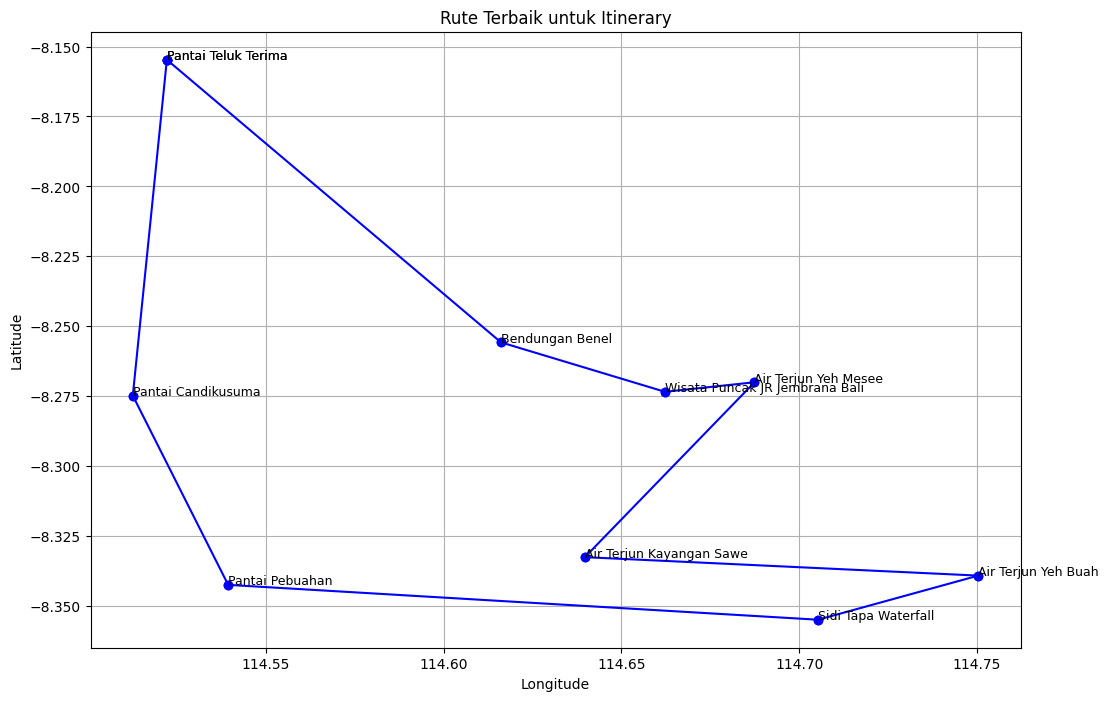

In [6]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.approximation import traveling_salesman_problem

# Buat graf dengan jarak sebagai bobot
G = nx.Graph()
for (place1, place2), distance in distances.items():
    G.add_edge(place1, place2, weight=distance)

# TSP dengan algoritma Nearest Neighbor
route = traveling_salesman_problem(G, weight='weight')
print("Rute terbaik: ", route)

# Fungsi untuk mengekstrak koordinat dari dataset
def get_coordinates(place, df):
    row = df[df['Place'] == place]
    if not row.empty:
        return (row.iloc[0]['Lat'], row.iloc[0]['Long'])
    else:
        return None

# Dapatkan koordinat untuk setiap tempat di rute
route_coords = [get_coordinates(place, df2) for place in route]

# Buat plot
plt.figure(figsize=(12, 8))

# Tambahkan edges ke plot
for i in range(len(route_coords) - 1):
    x_values = [route_coords[i][1], route_coords[i+1][1]]
    y_values = [route_coords[i][0], route_coords[i+1][0]]
    plt.plot(x_values, y_values, 'bo-')  # 'bo-' menggambarkan titik biru dengan garis solid

# Tambahkan edge dari tempat terakhir ke tempat pertama untuk menutup rute
x_values = [route_coords[-1][1], route_coords[0][1]]
y_values = [route_coords[-1][0], route_coords[0][0]]
plt.plot(x_values, y_values, 'bo-')

# Tambahkan nama tempat ke plot
for place, (lat, long) in zip(route, route_coords):
    plt.text(long, lat, place, fontsize=9)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Rute Terbaik untuk Itinerary')
plt.grid()
plt.show()